In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/00010/Desktop/Projects/Startup Funding Dashboard/startup_funding.csv")

In [3]:
df.rename(columns={"Date dd/mm/yyyy":"Date",
                   "InvestmentnType":"Investment Type",
                   "City  Location":"City",
                   "SubVertical":"Sub vertical"                  
                   },inplace=True)
df.drop(columns=['Remarks'],inplace=True)


In [4]:
df["Date"].replace({'05/072018':'05/07/2018'})
df.loc[[2606,3029,192,2571],"Date"]=['10/7/2015','22/01/2015','05/07/2018','01/07/2015']
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

In [5]:
df["Startup Name"] = df["Startup Name"].str.replace('https://www.','').str.replace('.in','').str.replace('/','').str.strip().str.lower().str.split('  ').str[0].str.replace('.com','').str.capitalize()

In [6]:
df.fillna({'Industry Vertical': 'Others', 'Sub vertical': 'Others', 'City': 'N/A'}, inplace=True)

In [7]:
df["Investment Type"] = df["Investment Type"].str.lower().str.strip()
df["Investment Type"].replace({'seed':'seed round',
                               'single venture':'seed round',
                               'pre-series a':'seed round',
                               'seed funding':'seed round',
                               'maiden round':'seed round',
                               'funding round':'seed round',
                               'seed funding round':'seed round',
                               'seed\\\\nfunding':'seed round',
                               'angel / seed funding':'angel/seed funding',
                               'seed / angel funding':'angel/seed funding',
                               'private equity round':'private equity',
                               'private funding':'private equity',
                               'privateequity':'private equity',
                               'private\\\\nequity':'private equity',
                               'equity':'private equity',
                               'equity based funding':'private equity',
                               'corporate round':'series a',
                               'angel funding':'angel',
                               'single venture':'venture',
                               'venture round':'venture',
                               'venture - series unknown':'venture'
                               },inplace=True)
df["Investment Type"].fillna('N/A',inplace=True)
df["Investment Type"]=df["Investment Type"].str.capitalize()


C:\Users\00010\AppData\Local\Temp\ipykernel_11384\4186556632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Investment Type"].replace({'seed':'seed round',


In [8]:
df.columns

Index(['Sr No', 'Date', 'Startup Name', 'Industry Vertical', 'Sub vertical',
       'City', 'Investors Name', 'Investment Type', 'Amount in USD'],
      dtype='object')

In [9]:
df['City'] = df['City'].apply(lambda x : x.split('/')[0] if isinstance(x,str) and  '/' in x else x)
df['City'] = df['City'].str.strip().apply(lambda x : x.split('0')[1] if  isinstance(x,str) and'0' in x else x)
df['City'].replace({'Gurgaon':'Gurugram',
                    'Nw Delhi':'New Delhi',
                    'Delhi': 'New Delhi',
                    'N':'Other',
                    'USA':'US',
                    'Bangalore':'Bengaluru'
                    },inplace=True)


C:\Users\00010\AppData\Local\Temp\ipykernel_11384\2634664232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace({'Gurgaon':'Gurugram',


In [10]:
df['Investors Name'] = df['Investors Name'].str.strip().fillna('Undisclosed')

In [11]:
df.columns

Index(['Sr No', 'Date', 'Startup Name', 'Industry Vertical', 'Sub vertical',
       'City', 'Investors Name', 'Investment Type', 'Amount in USD'],
      dtype='object')

In [12]:
df.sample(5)

,Sr No,Date,Startup Name,Industry Vertical,Sub vertical,City,Investors Name,Investment Type,Amount in USD
1561,1562,2016-07-21,Wiwigo,Consumer Internet,Inter-City Taxi Booking platform,Bengaluru,Indian Angel Network,Seed round,"5,95,000"
2348,2349,2015-10-21,Jiyo natural,Healthy Meals Food delivery platform,Others,Bengaluru,Indian Angel Network,Seed round,NaN
1417,1418,2016-02-08,Sheroes,Consumer Internet,Online Job and Career Platform for Women,Noida,"Lumis Partners, The HR Fund, Rajul Garg, Quint...",Private equity,"18,00,000"
1297,1298,2016-10-14,Beatroute,Technology,SAAS based mobile application platform,Gurugram,Quarizon Consultancy Services LLP,Seed round,NaN
341,342,2018-03-22,I2i funding,Consumer Internet,Online loan platform,Noida,SucSEED Venture Partners,Angel/seed funding,"7,68,000"


In [13]:
df['Amount in USD']=df['Amount in USD'].str.replace(r'[^0-9]','',regex=True).str.strip()
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'],errors ='coerce')
df['Amount in USD'] = df['Amount in USD'].fillna(0).astype(int)
def convert_to_readable(amount):
    if amount >= 10**7:  # 1 crore = 10 million
        return f"{amount / 10**7:.1f} crores"
    elif amount >= 10**5:  # 1 lakh = 100,000
        return f"{amount / 10**5:.1f} lakhs"
    else:
        return f"{amount} Rs"
df["Amount in Rs."] = (df['Amount in USD']*84.08).apply(convert_to_readable)
df["Amount in Rs."]

0       1681.6 crores
1         67.7 crores
2        154.4 crores
3         25.2 crores
4         15.1 crores
            ...      
3039      37.8 crores
3040       6.9 crores
3041      12.6 crores
3042           0.0 Rs
3043       1.2 crores
Name: Amount in Rs., Length: 3044, dtype: object

In [14]:
Industry_compete = df[df['Startup Name']=='Shuttl']["Industry Vertical"].iloc[0]
competitors = ',\n, '.join(df[(df["Industry Vertical"]==Industry_compete)&(df['Startup Name']!='Shuttl')]['Startup Name'].unique())

In [15]:
competitors

'Rapido bike taxi,\n, Vogo automotive pvt. ltd.'

In [16]:
investor_name = 'Sequoia Capital India'
investor_df = df[df["Investors Name"].str.contains(rf'\b{investor_name}\b',case=False,na=False)]
plot_pie = investor_df[["Industry Vertical","Amount in USD"]].sort_values("Amount in USD",ascending=False).reset_index().drop(columns=["index"]).set_index(['Industry Vertical']).reset_index()
plot_pie = plot_pie.groupby("Industry Vertical").sum().head(15)
plot_pie

,Amount in USD
Industry Vertical,
Consumer Internet,632200000
E-Commerce,60000000
E-commerce,18358860
Food & Beverage,6300000
Healthcare,6000000
Logistics Tech,14680000
Others,50000000
Technology,83000000
eCommerce,12000000


[]

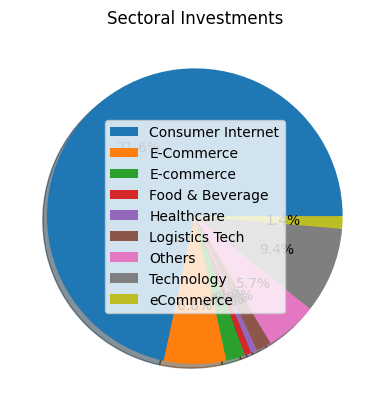

In [17]:
import matplotlib.pyplot as plt
plt.pie(plot_pie["Amount in USD"],autopct='%0.1f%%',shadow=True)
plt.legend(plot_pie.index)
plt.title("Sectoral Investments")
plt.plot()


In [18]:
df["Industry Vertical"].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [19]:
df["Industry Vertical"].replace({'E-commerce':'E-Commerce',
                                 'eCommece':'E-Commerce',
                                 'Ecommerce':'E-Commerce',
                                 'ECommerce':'E-Commerce',
                                 'eCommerce':'E-Commerce',
                                 'Health and wellness':'Health and Wellness',
                                 'Tele-Shopping / eCommerce':'E-Commerce',
                                 'E-Tech':'Ed-Tech',
                                 'Ed-tech':'Ed-Tech',
                                 'Fiinance':'Finance',
                                 'Financial Markets Software':'Fin-Tech',
                                 'Consumer Interne':'Consumer Internet',
                                 'Financial Tech':'Fin-Tech',
                                 'Services Platform':'Saas',      
                                 },inplace=True)


C:\Users\00010\AppData\Local\Temp\ipykernel_11384\2117637074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Industry Vertical"].replace({'E-commerce':'E-Commerce',


In [20]:
city_df = investor_df.groupby("City").agg({"Amount in USD":"sum"})
investor_df["Year"] = investor_df["Date"].dt.year
date_df =investor_df[["Year","Amount in USD"]]
date_df = date_df.groupby("Year").agg({"Amount in USD":"sum"})

C:\Users\00010\AppData\Local\Temp\ipykernel_11384\3852602873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investor_df["Year"] = investor_df["Date"].dt.year


In [21]:
df.columns

Index(['Sr No', 'Date', 'Startup Name', 'Industry Vertical', 'Sub vertical',
       'City', 'Investors Name', 'Investment Type', 'Amount in USD',
       'Amount in Rs.'],
      dtype='object')

C:\Users\00010\AppData\Local\Temp\ipykernel_11384\2067411066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Month"] = new_df["Date"].dt.month_name()
C:\Users\00010\AppData\Local\Temp\ipykernel_11384\2067411066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Year"] = new_df["Date"].dt.year


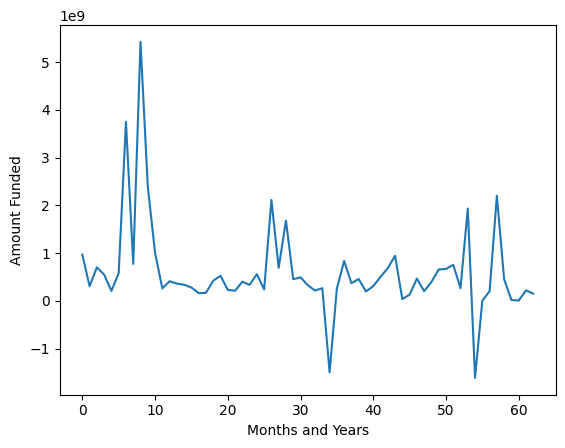

In [22]:
new_df = df[["Date","Startup Name","Investment Type","Amount in USD"]]
new_df["Month"] = new_df["Date"].dt.month_name()
new_df["Year"] = new_df["Date"].dt.year
new_mom_df = new_df.groupby(["Month","Year"]).agg({'Startup Name':'count',"Amount in USD":"sum"}).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
new_mom_df['Month'] = pd.Categorical(new_mom_df['Month'],categories=month_order,ordered=True)
new_mom_df = new_mom_df.sort_values(['Year', 'Month'])
plt.xlabel("Months and Years")
plt.ylabel("Amount Funded")
plt.plot(range(new_mom_df.shape[0]),new_mom_df["Amount in USD"])

In [23]:
df.sort_values(by="Amount in USD",ascending=False)["Amount in Rs."].iloc[0]

'16984.2 crores'

In [24]:
str(df["Startup Name"].unique().shape[0]-1)+'+'


'2316+'

In [25]:
sectoral_df = df.groupby("Industry Vertical").agg({"Industry Vertical":"count","Amount in USD":"sum"}).rename(columns={"Industry Vertical":"Count"}).reset_index().sort_values(by=["Count","Amount in USD"],ascending=False).head(10).drop(columns='Count')
sectoral_df.rename(columns={"Industry Vertical":"Sector","Amount in USD":"Total Funding"},inplace=True)
sectoral_df



,Sector,Total Funding
110,Consumer Internet,6253084245
712,Technology,2229707930
167,E-Commerce,4117779623
568,Others,1250999368
277,Healthcare,381218000
229,Finance,1974238000
371,Logistics,242845000
187,Education,301143000
240,Food & Beverage,42236000
183,Ed-Tech,235548640


In [49]:
invest_df = df[['Investment Type','Amount in USD']].groupby("Investment Type").agg({"Amount in USD":"sum"}).sort_values(by="Amount in USD",ascending=False).head(6)

In [72]:
df["Year"] = df["Date"].dt.year
df.groupby("Year").agg({"Amount in USD":"max"})

,Amount in USD
Year,
2015,2020000000
2016,200000000
2017,1400000000
2018,600000000
2019,1510950000
2020,200000000
